<a href="https://colab.research.google.com/github/MrMatier/Sygnaly-i-obrazy-cyfrowe/blob/main/Interpolacja_MateuszMarko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INTERPOLACJA KONWOLUCJĄ

Interpolacja funkcji f1:
Jądro h1:


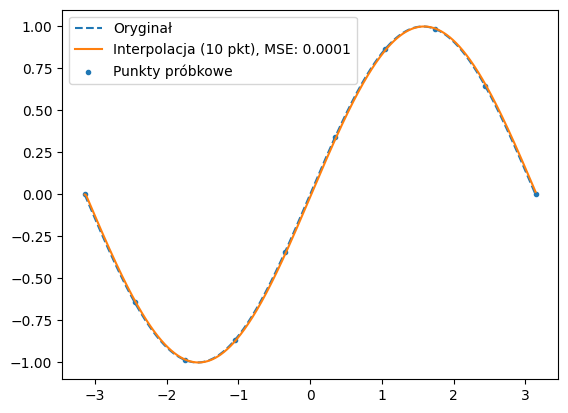

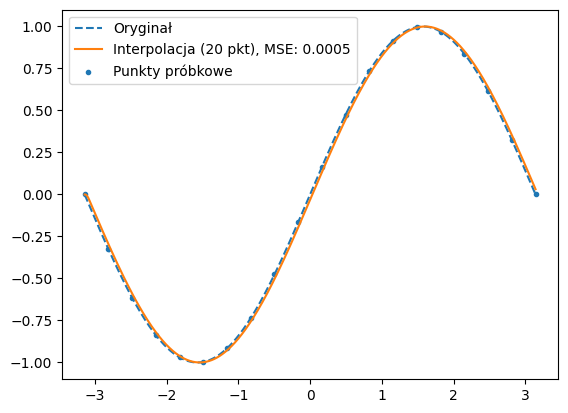

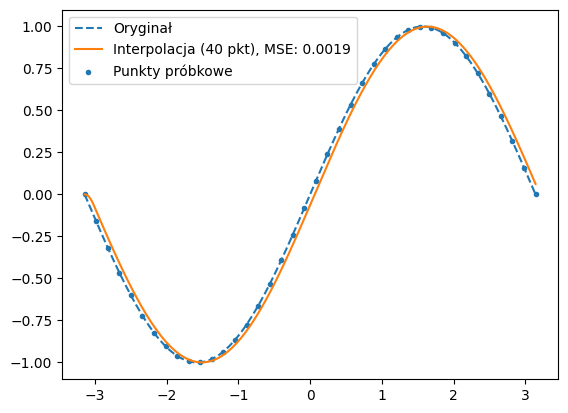

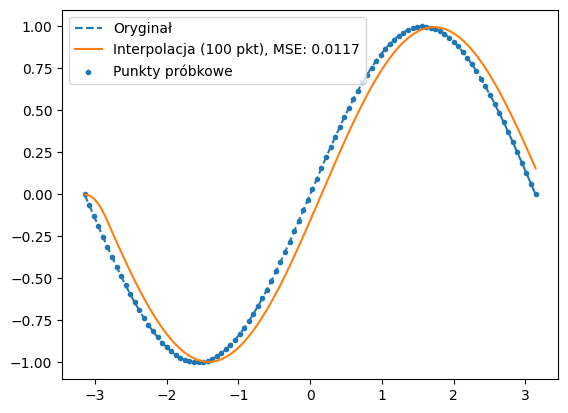

Jądro h2:


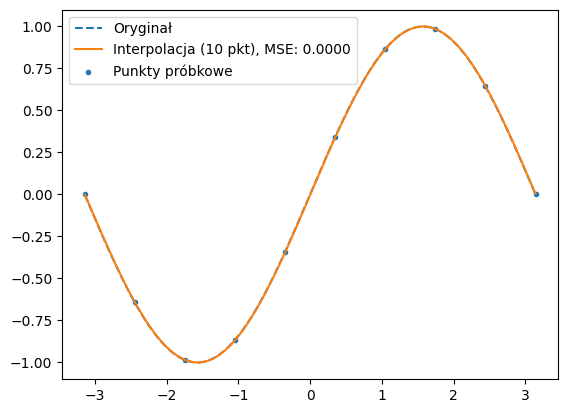

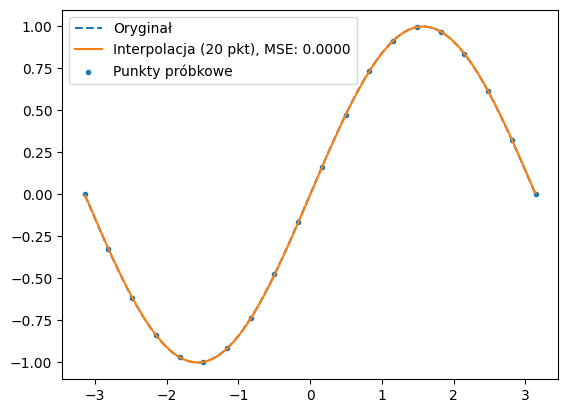

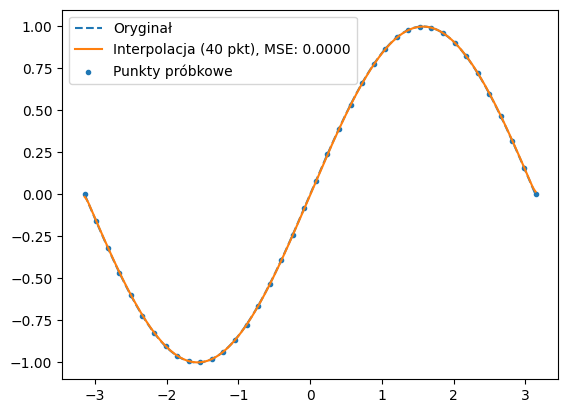

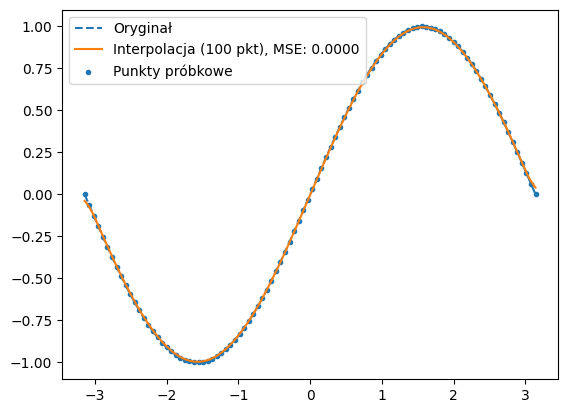

Jądro h3:


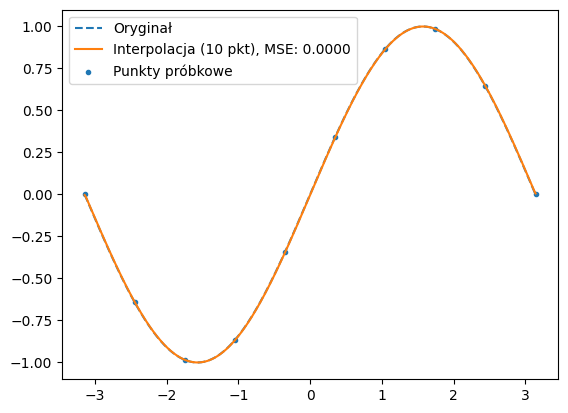

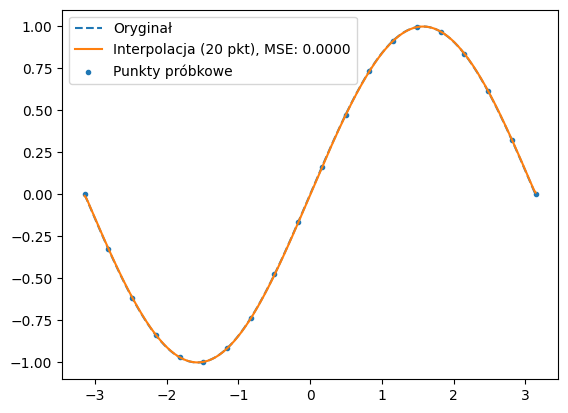

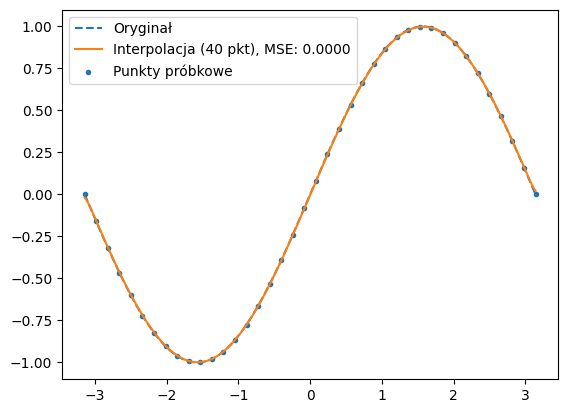

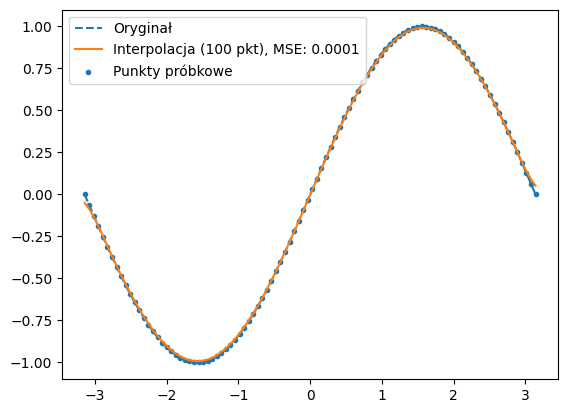

Interpolacja funkcji f2:
Jądro h1:


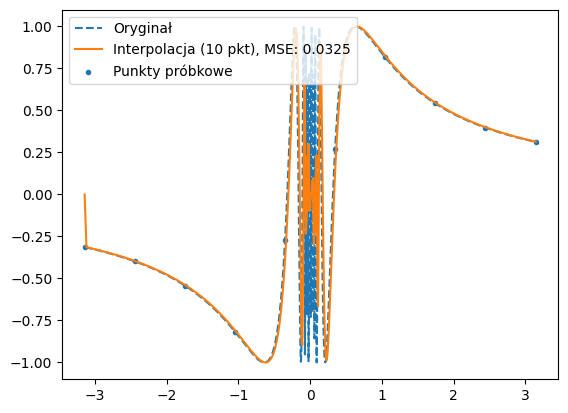

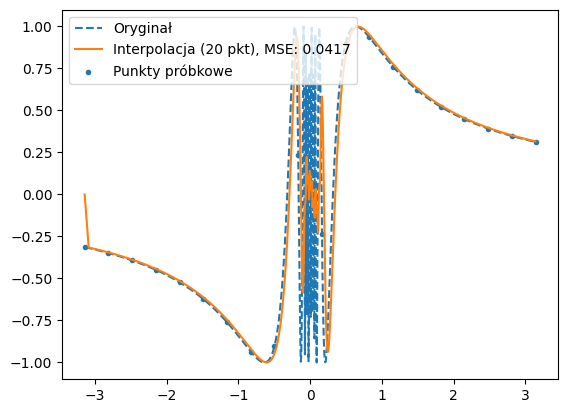

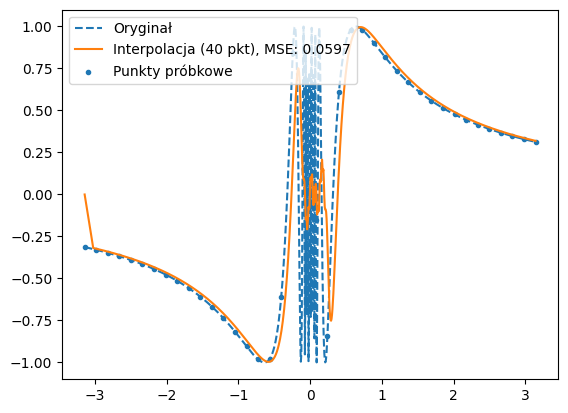

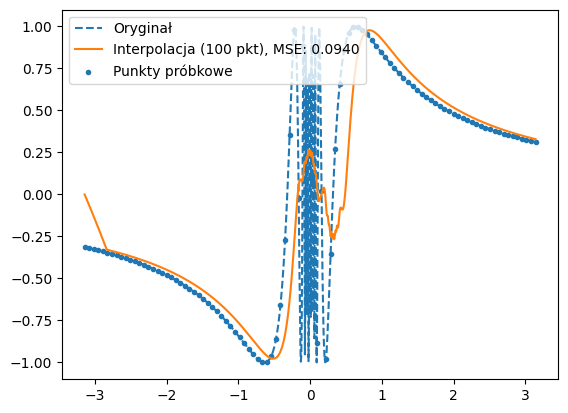

Jądro h2:


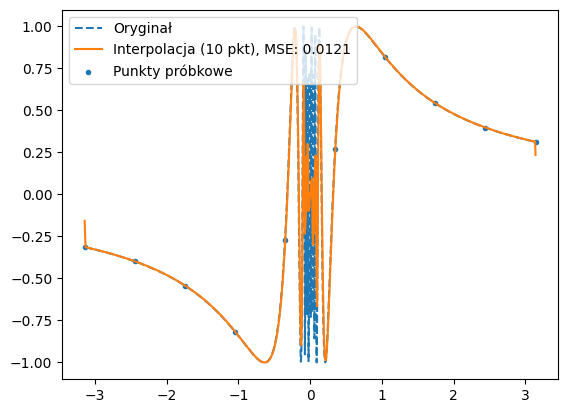

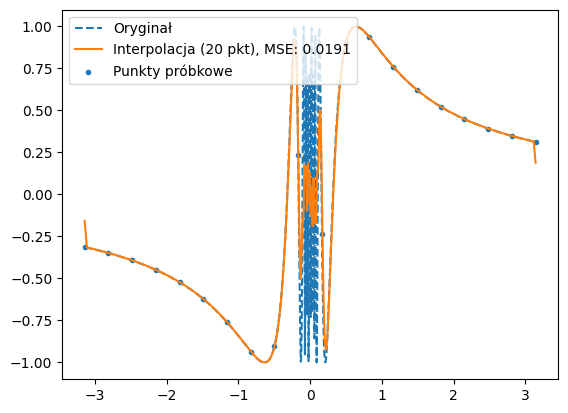

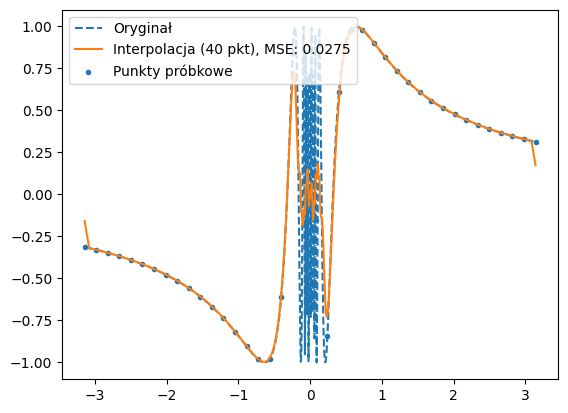

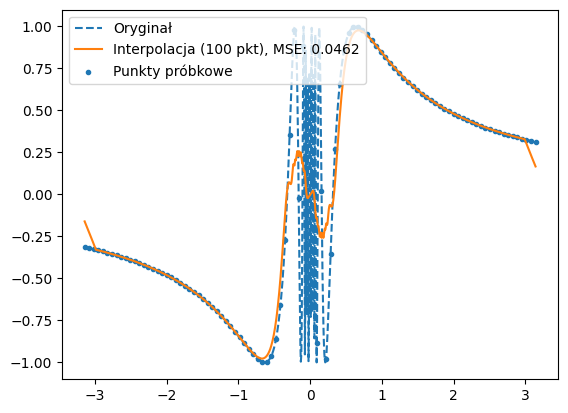

Jądro h3:


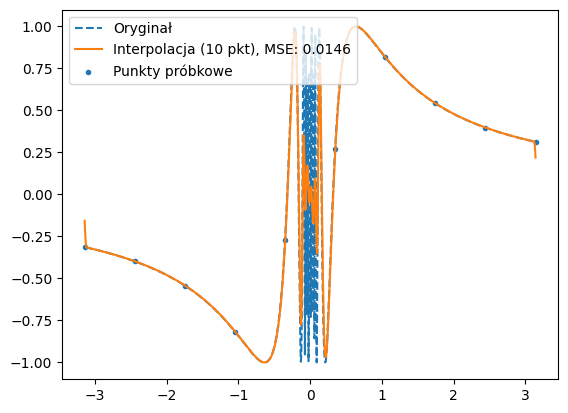

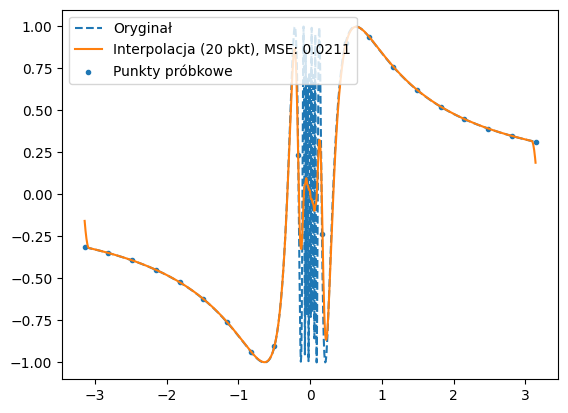

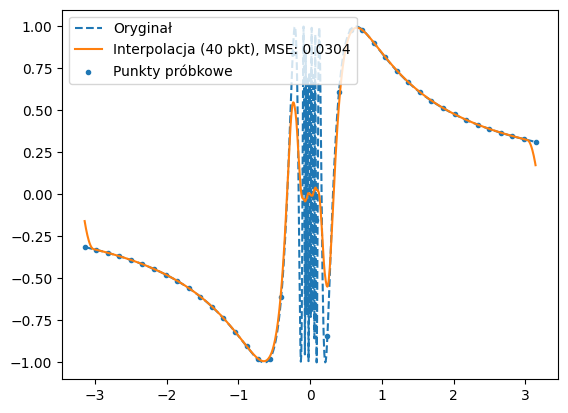

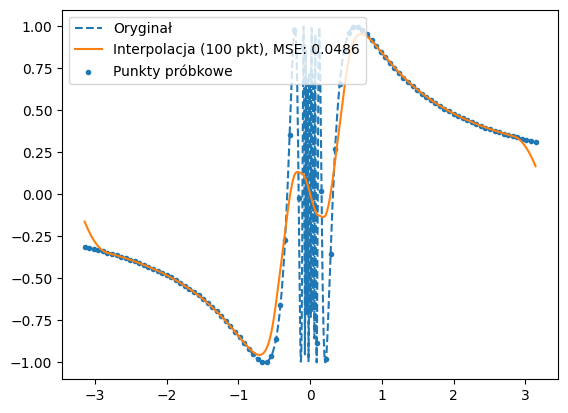

Interpolacja funkcji f3:
Jądro h1:


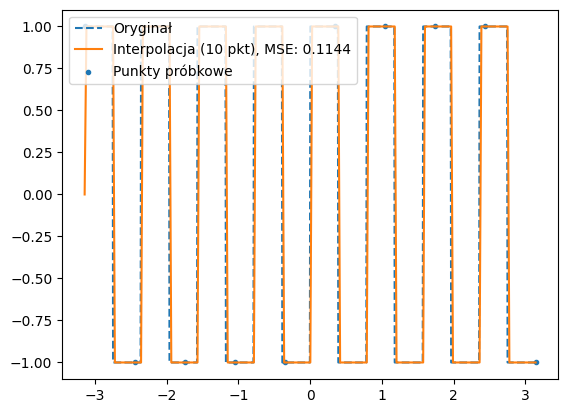

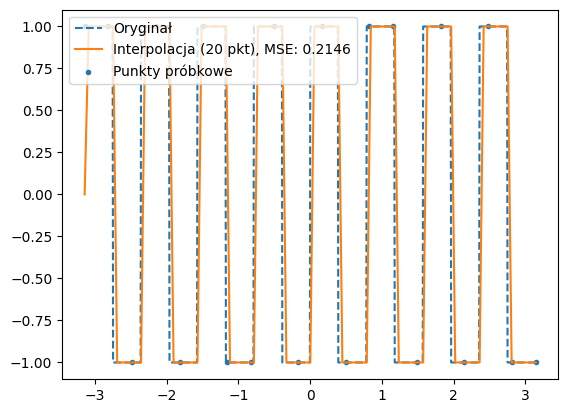

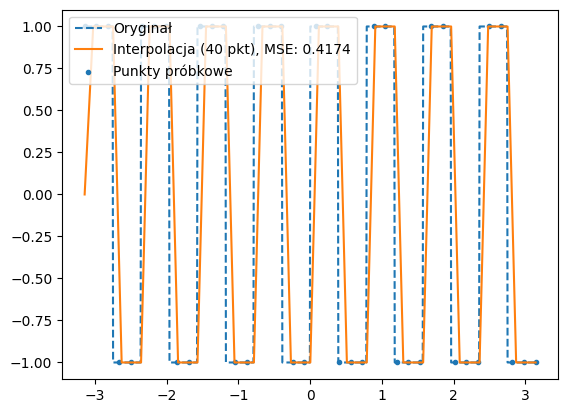

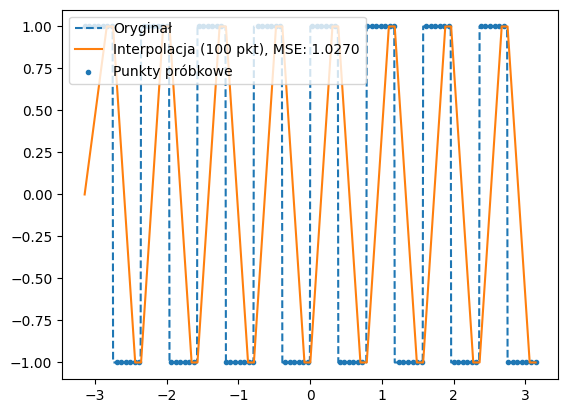

Jądro h2:


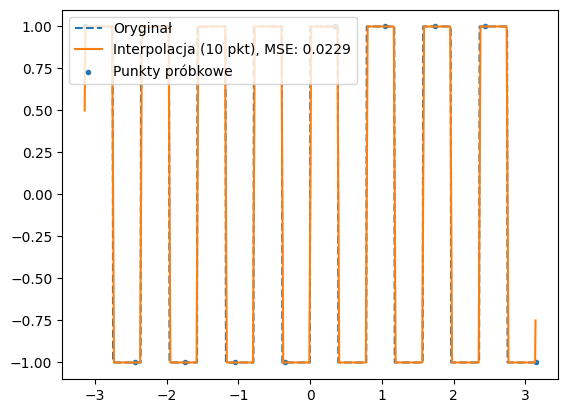

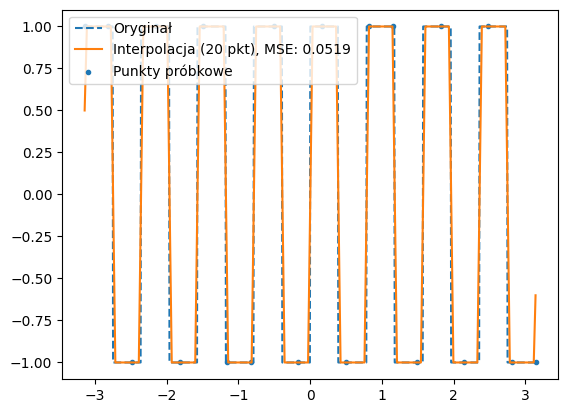

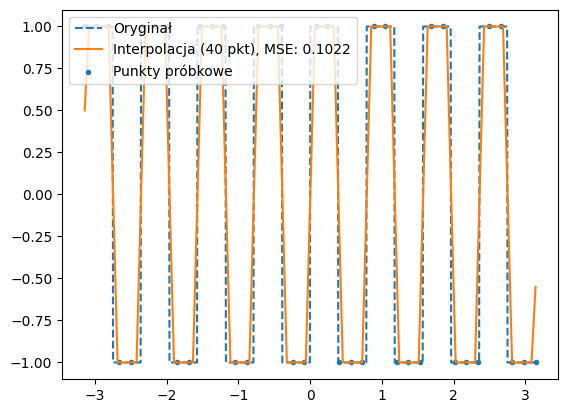

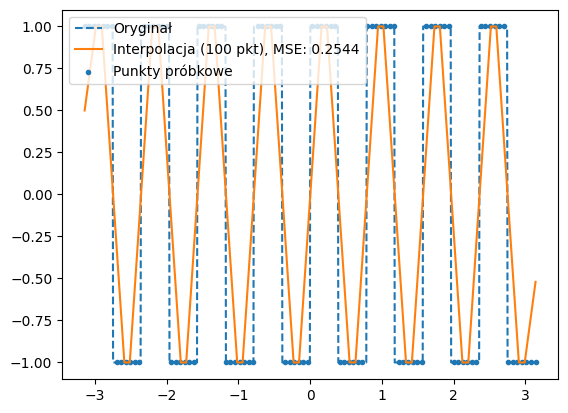

Jądro h3:


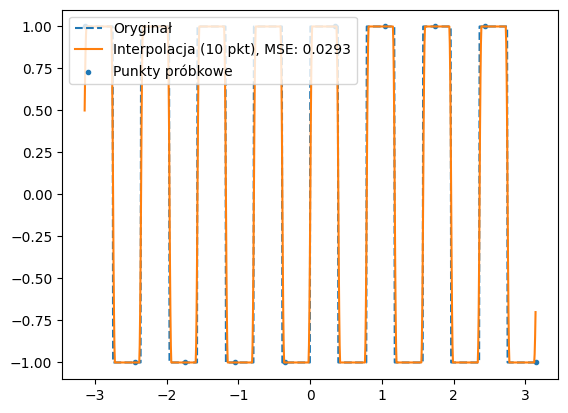

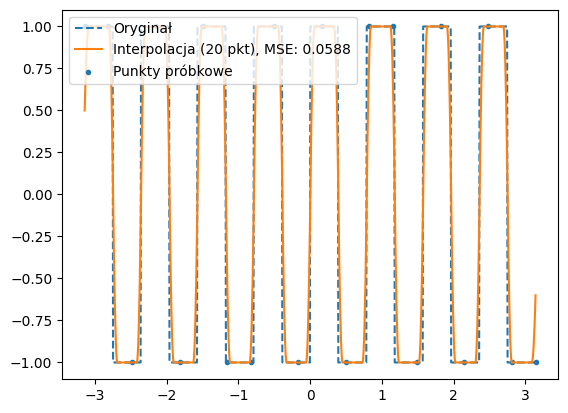

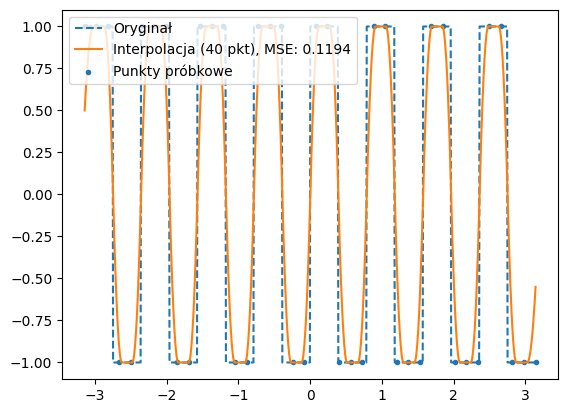

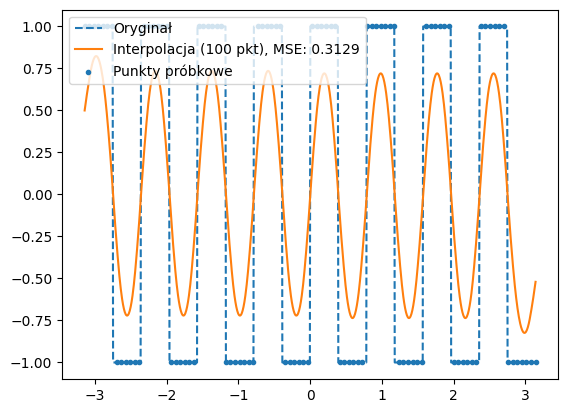

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

def f1(x):
    return np.sin(x)

def f2(x):
    return np.sin(1/x)

def f3(x):
    return np.sign(np.sin(8*x))

funkcje = [f1, f2, f3]

def h1(t):
    return np.where((t >= 0) & (t < 1), 1, 0)

def h2(t):
    return np.where((t >= -1/2) & (t <= 1/2), 1, 0)

def h3(t):
    return np.where((t >= -1) & (t <= 1), 1 - np.abs(t), 0)

jadra = [h1, h2, h3]

def interpoluj(foryginalna, k, liczba_punktow):
    x_oryginal = np.linspace(-np.pi, np.pi, 1000)
    y_oryginal = foryginalna(x_oryginal)

    x_interpolowany = np.linspace(-np.pi, np.pi, 1000)
    y_interpolowany = convolve(y_oryginal, k, mode='same', method='auto') / np.sum(k)

    mse = oblicz_mse(foryginalna(x_oryginal), y_interpolowany)

    return x_interpolowany, y_interpolowany, mse

def oblicz_mse(y_oryginal, y_interpolowane):
    N = len(y_oryginal)
    moje_mse = np.sum((y_oryginal - y_interpolowane)**2) / N
    return moje_mse

ile_punktow = [10, 20, 40, 100]

for f in funkcje:
    print(f"Interpolacja funkcji {f.__name__}:")
    for k in jadra:
        print(f"Jądro {k.__name__}:")
        for liczba_punktow in ile_punktow:
            x_interpolowane, y_interpolowane, moje_mse = interpoluj(f, k(np.linspace(-1, 1, liczba_punktow)), liczba_punktow)

            plt.plot(np.linspace(-np.pi, np.pi, 1000), f(np.linspace(-np.pi, np.pi, 1000)), label="Oryginał", linestyle='dashed')
            plt.plot(x_interpolowane, y_interpolowane, label=f"Interpolacja ({liczba_punktow} pkt), MSE: {moje_mse:.4f}")
            plt.scatter(np.linspace(-np.pi, np.pi, liczba_punktow), f(np.linspace(-np.pi, np.pi, liczba_punktow)), marker='.', label="Punkty próbkowe")
            plt.legend(loc='upper left')
            plt.show()



INTERPOLACJA ŚREDNIĄ - SIN(X)

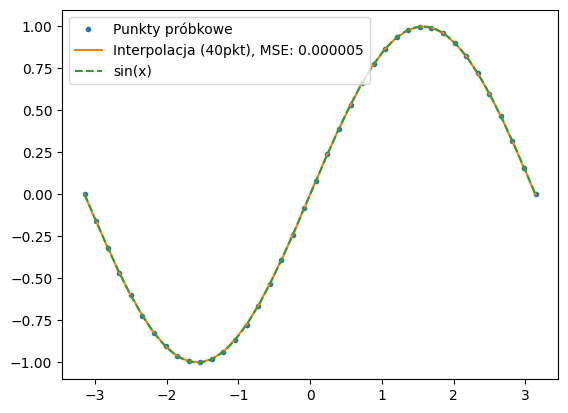

In [ ]:
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

x = np.linspace(-np.pi, np.pi, 1000)
y = np.sin(x)
x_punkty = np.linspace(-np.pi, np.pi, 40)
y_punkty = np.sin(x_punkty)

def interpolacja_srednia(x, x_dane, y_dane):
    y = np.zeros_like(x)
    x_lewy = x_dane[0]
    x_prawy = x_dane[1]
    y_lewy = y_dane[0]
    y_prawy = y_dane[1]
    liczba_x = -1
    tab_liczba_x = []
    nr = 0
    nr2 = 0

    for i, xi in enumerate(x):
        for j, xj in enumerate(x_dane[:-1]):
            if xi >= x_dane[j] and xi < x_dane[j + 1]:
                liczba_x = liczba_x + 1
                if x_lewy != x_dane[j]:
                    x_lewy = x_dane[j]
                    x_prawy = x_dane[j + 1]
                    tab_liczba_x.append(liczba_x)
                    liczba_x = 0
                break

    liczba_x = liczba_x + 1
    tab_liczba_x.append(liczba_x)

    for i, xi in enumerate(x):
        for j, xj in enumerate(x_dane[:-1]):
            if xi >= x_dane[j] and xi < x_dane[j + 1]:
                nr = nr + 1
                if x_lewy != x_dane[j]:
                    x_lewy = x_dane[j]
                    x_prawy = x_dane[j + 1]
                    y_lewy = y_dane[j]
                    y_prawy = y_dane[j + 1]
                    nr = 0
                    nr2 = nr2 + 1
                break
        nr3 = tab_liczba_x[nr2 - 1] - nr - 1
        nr4 = tab_liczba_x[nr2 - 1] - 1
        wynik = y_lewy * nr3 / nr4 + y_prawy * nr / nr4
        y[i] = wynik

    mse = mean_squared_error(y, np.sin(x))

    return y, mse

y_srednia, mse = interpolacja_srednia(x, x_punkty, y_punkty)

plt.plot(x_punkty, y_punkty, ".", label="Punkty próbkowe")
plt.plot(x, y_srednia, label=f"Interpolacja (40pkt), MSE: {mse:.6f}")
plt.plot(x, y, label="sin(x)", linestyle="--")
plt.legend(loc='upper left')
plt.show()


INTERPOLACJA ŚREDNIĄ - SIN(1/X)

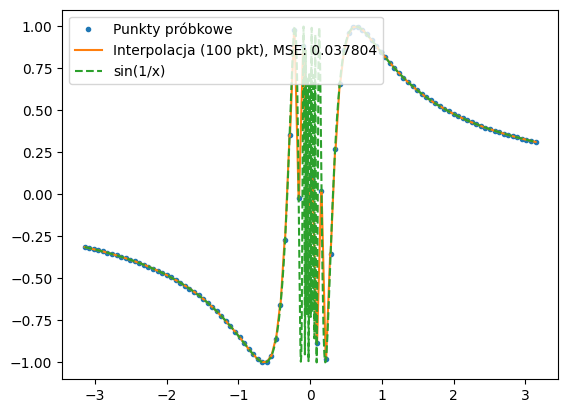

In [ ]:
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

x = np.linspace(-np.pi, np.pi, 1000)
y = np.sin(1/x)
x_punkty = np.linspace(-np.pi, np.pi, 100)
y_punkty = np.sin(1/x_punkty)

def interpolacja_srednia(x, x_dane, y_dane):
    y = np.zeros_like(x)
    x_lewy = x_dane[0]
    x_prawy = x_dane[1]
    y_lewy = y_dane[0]
    y_prawy = y_dane[1]
    liczba_x = -1
    tab_liczba_x = []
    nr = 0
    nr2 = 0

    for i, xi in enumerate(x):
        for j, xj in enumerate(x_dane[:-1]):
            if xi >= x_dane[j] and xi < x_dane[j + 1]:
                liczba_x = liczba_x + 1
                if x_lewy != x_dane[j]:
                    x_lewy = x_dane[j]
                    x_prawy = x_dane[j + 1]
                    tab_liczba_x.append(liczba_x)
                    liczba_x = 0
                break

    liczba_x = liczba_x + 1
    tab_liczba_x.append(liczba_x)

    for i, xi in enumerate(x):
        for j, xj in enumerate(x_dane[:-1]):
            if xi >= x_dane[j] and xi < x_dane[j + 1]:
                nr = nr + 1
                if x_lewy != x_dane[j]:
                    x_lewy = x_dane[j]
                    x_prawy = x_dane[j + 1]
                    y_lewy = y_dane[j]
                    y_prawy = y_dane[j + 1]
                    nr = 0
                    nr2 = nr2 + 1
                break
        nr3 = tab_liczba_x[nr2 - 1] - nr - 1
        nr4 = tab_liczba_x[nr2 - 1] - 1
        wynik = y_lewy * nr3 / nr4 + y_prawy * nr / nr4
        y[i] = wynik

    mse = mean_squared_error(y, np.sin(1/x))

    return y, mse

y_srednia, mse = interpolacja_srednia(x, x_punkty, y_punkty)

plt.plot(x_punkty, y_punkty, ".", label="Punkty próbkowe")
plt.plot(x, y_srednia, label=f"Interpolacja (100 pkt), MSE: {mse:.6f}")
plt.plot(x, y, label="sin(1/x)", linestyle="--")
plt.legend(loc='upper left')
plt.show()


INTERPOLACJA ŚREDNIĄ - SGN(SIN(8X))

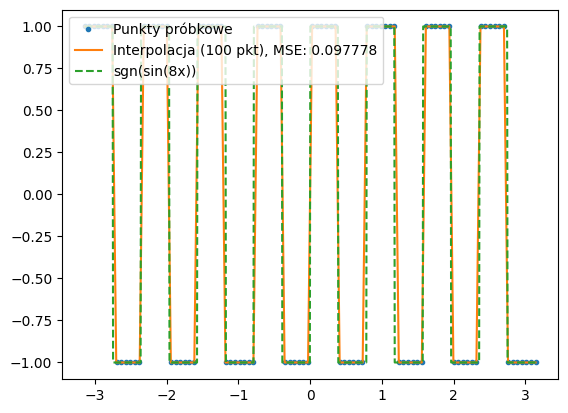

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

x = np.linspace(-np.pi, np.pi, 1000)
y = np.sign(np.sin(8*x))
x_punkty = np.linspace(-np.pi, np.pi, 100)
y_punkty = np.sign(np.sin(8*x_punkty))

def interpolacja_srednia(x, x_dane, y_dane):
    y = np.zeros_like(x)
    x_lewy = x_dane[0]
    x_prawy = x_dane[1]
    y_lewy = y_dane[0]
    y_prawy = y_dane[1]
    liczba_x = -1
    tab_liczba_x = []
    nr = 0
    nr2 = 0

    for i, xi in enumerate(x):
        for j, xj in enumerate(x_dane[:-1]):
            if xi >= x_dane[j] and xi < x_dane[j + 1]:
                liczba_x = liczba_x + 1
                if x_lewy != x_dane[j]:
                    x_lewy = x_dane[j]
                    x_prawy = x_dane[j + 1]
                    tab_liczba_x.append(liczba_x)
                    liczba_x = 0
                break

    liczba_x = liczba_x + 1
    tab_liczba_x.append(liczba_x)

    for i, xi in enumerate(x):
        for j, xj in enumerate(x_dane[:-1]):
            if xi >= x_dane[j] and xi < x_dane[j + 1]:
                nr = nr + 1
                if x_lewy != x_dane[j]:
                    x_lewy = x_dane[j]
                    x_prawy = x_dane[j + 1]
                    y_lewy = y_dane[j]
                    y_prawy = y_dane[j + 1]
                    nr = 0
                    nr2 = nr2 + 1
                break
        nr3 = tab_liczba_x[nr2 - 1] - nr - 1
        nr4 = tab_liczba_x[nr2 - 1] - 1
        wynik = y_lewy * nr3 / nr4 + y_prawy * nr / nr4
        y[i] = wynik

    mse = mean_squared_error(y, np.sign(np.sin(8*x)))

    return y, mse
y_srednia, mse = interpolacja_srednia(x, x_punkty, y_punkty)

plt.plot(x_punkty, y_punkty, ".", label="Punkty próbkowe")
plt.plot(x, y_srednia, label=f"Interpolacja (100 pkt), MSE: {mse:.6f}")
plt.plot(x, y, label="sgn(sin(8x))", linestyle="--")
plt.legend(loc='upper left')
plt.show()


WPŁYW ROZMIESZCZENIA I ILOŚCI PUNKTÓW NA JAKOŚĆ

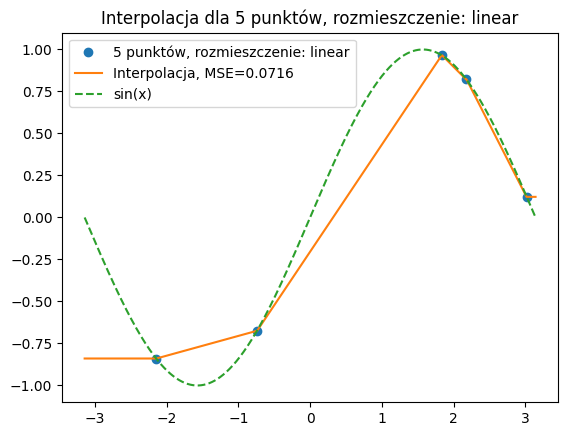

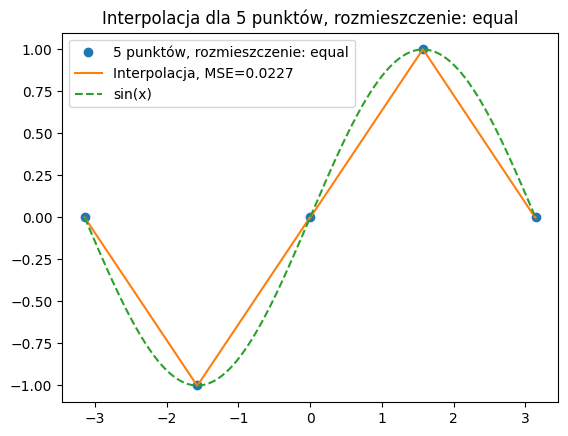

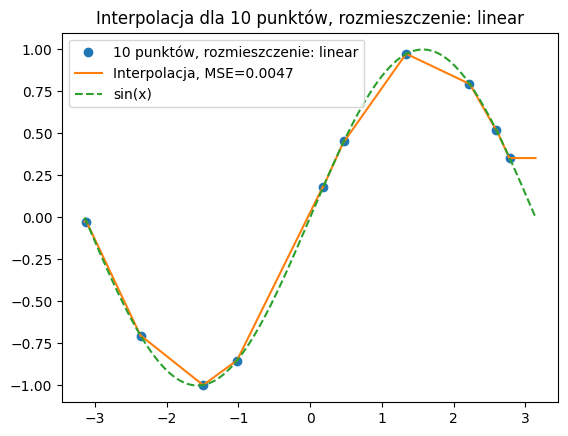

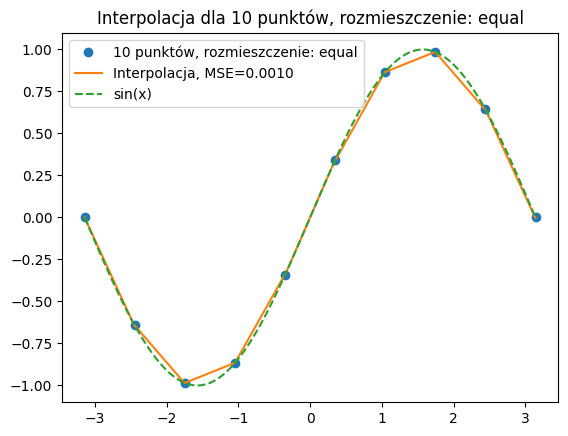

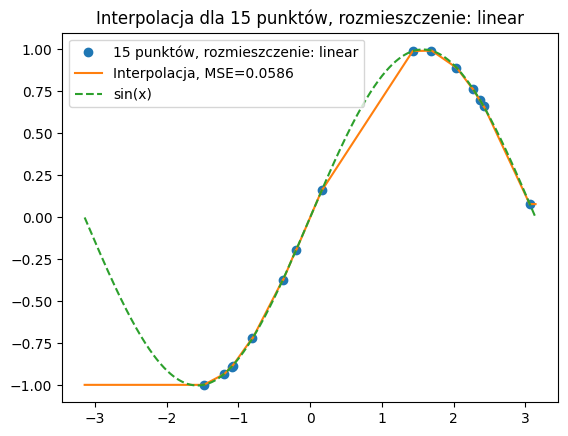

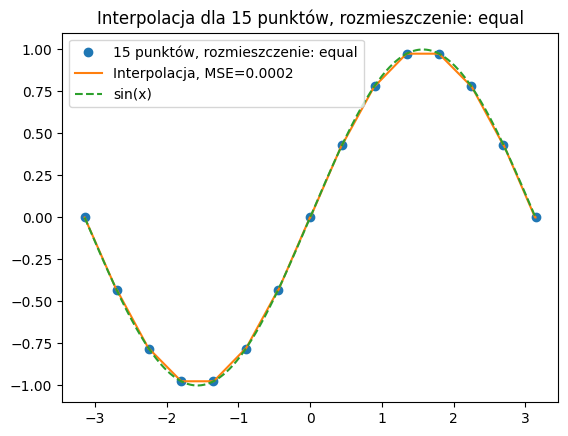

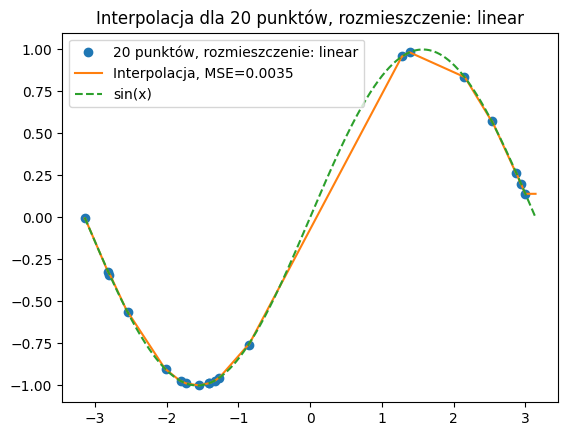

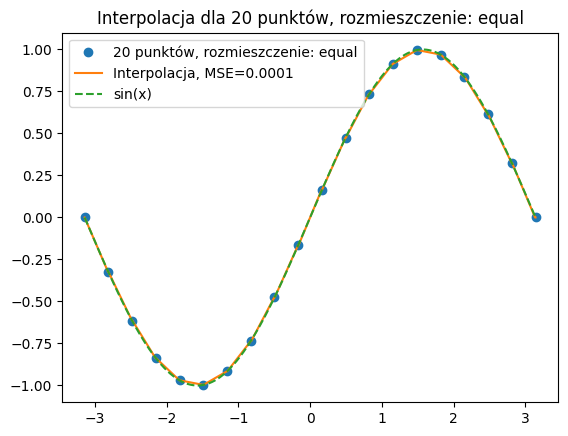

In [ ]:
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

def srednia_interpolacja(x, x_dane, y_dane):
    y = np.zeros_like(x)
    x_lewy = x_dane[0]
    x_prawy = x_dane[1]
    y_lewy = y_dane[0]
    y_prawy = y_dane[1]
    liczba_x = -1
    tab_liczba_x = []
    nr = 0
    nr2 = 0

    for i, xi in enumerate(x):
        for j, xj in enumerate(x_dane[:-1]):
            if xi >= x_dane[j] and xi < x_dane[j + 1]:
                liczba_x = liczba_x + 1
                if x_lewy != x_dane[j]:
                    x_lewy = x_dane[j]
                    x_prawy = x_dane[j + 1]
                    tab_liczba_x.append(liczba_x)
                    liczba_x = 0
                break

    liczba_x = liczba_x + 1
    tab_liczba_x.append(liczba_x)

    for i, xi in enumerate(x):
        for j, xj in enumerate(x_dane[:-1]):
            if xi >= x_dane[j] and xi < x_dane[j + 1]:
                nr = nr + 1
                if x_lewy != x_dane[j]:
                    x_lewy = x_dane[j]
                    x_prawy = x_dane[j + 1]
                    y_lewy = y_dane[j]
                    y_prawy = y_dane[j + 1]
                    nr = 0
                    nr2 = nr2 + 1
                break
        nr3 = tab_liczba_x[nr2 - 1] - nr - 1
        nr4 = tab_liczba_x[nr2 - 1] - 1

        if nr4 != 0:
            wynik = y_lewy * nr3 / nr4 + y_prawy * nr / nr4
            y[i] = wynik
        else:
            y[i] = y_lewy  # Jeśli nr4 równa zero to y_lewy

    mse = mean_squared_error(y, np.sin(x))
    return y, mse

liczba_punktow_lista = [5, 10, 15, 20]
rozmieszczenie_lista = ['linear', 'equal']

for liczba_punktow in liczba_punktow_lista:
    for rozmieszczenie in rozmieszczenie_lista:
        x_punkty = np.linspace(-np.pi, np.pi, liczba_punktow)
        if rozmieszczenie == 'equal':
            x_punkty = np.linspace(-np.pi, np.pi, liczba_punktow)
        elif rozmieszczenie == 'linear':
            x_punkty = np.sort(np.random.uniform(-np.pi, np.pi, liczba_punktow))

        y_punkty = np.sin(x_punkty)
        x_interpolacja = np.linspace(-np.pi, np.pi, 1000)

        y_srednia, mse = srednia_interpolacja(x_interpolacja, x_punkty, y_punkty)

        plt.plot(x_punkty, y_punkty, "o", label=f"{liczba_punktow} punktów, rozmieszczenie: {rozmieszczenie}")
        plt.plot(x_interpolacja, y_srednia, label=f"Interpolacja, MSE={mse:.4f}")
        plt.plot(x_interpolacja, np.sin(x_interpolacja), label="sin(x)", linestyle="--")
        plt.legend()
        plt.title(f"Interpolacja dla {liczba_punktow} punktów, rozmieszczenie: {rozmieszczenie}")
        plt.show()
